# **Samuel Vasco Vasco González**  Cc. 1152223665

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Descarga del libro Adventures of Huckleberry Finn, by Mark Twain (en formato TXT)

In [2]:
from urllib.request import urlopen
contents = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')

#### **a)** Analisis del libro contando la aparición de tres nombres de personajes principales: Jim, Tom, Huck a través de los capítulos del libro.

In [3]:
chapter = ["CHAPTER I.","CHAPTER II.","CHAPTER III.","CHAPTER IV.","CHAPTER V.","CHAPTER VI.","CHAPTER VII.","CHAPTER VIII.",
             "CHAPTER IX.","CHAPTER X.","CHAPTER XI.","CHAPTER XII.","CHAPTER XIII.","CHAPTER XIV.","CHAPTER XV.","CHAPTER XVI.",
             "CHAPTER XVII.","CHAPTER XVIII.","CHAPTER XIX.","CHAPTER XX.","CHAPTER XXI.","CHAPTER XXII.","CHAPTER XXIII.",
             "CHAPTER XXIV.","CHAPTER XXV.","CHAPTER XXVI.","CHAPTER XXVII.","CHAPTER XXVIII.","CHAPTER XXIX.","CHAPTER XXX.",
             "CHAPTER XXXI.","CHAPTER XXXII.","CHAPTER XXXIII.","CHAPTER XXXIV.","CHAPTER XXXV.","CHAPTER XXXVI.",
             "CHAPTER XXXVII.","CHAPTER XXXVIII.","CHAPTER XXXIX.","CHAPTER XL.","CHAPTER XLI.","CHAPTER XLII.","CHAPTER THE LAST",
           "THE END. YOURS TRULY, _HUCK FINN_."]

Chapters=[]
Characters=["Tom","Jim","Huck"]

for i in range(len(chapter)-1):
  Chapters.append(contents[contents.find(chapter[i])+1+contents[contents.find(chapter[i])+1:].find(chapter[i]) : 
                           contents.find(chapter[i+1])+1+contents[contents.find(chapter[i+1])+1:].find(chapter[i+1])])

#### **b)** Resultados en formato Pandas DataFrame

In [4]:
Matrix = np.zeros((3,len(chapter)-1))

for i in range(Matrix.shape[0]):
  for j in range(Matrix.shape[1]):
    Matrix[i,j] = Chapters[j].count(Characters[i])

df = pd. DataFrame (data = Matrix, index = ["Tom", "Jim","Huck"], columns = chapter[:-1])
df

,CHAPTER I.,CHAPTER II.,CHAPTER III.,CHAPTER IV.,CHAPTER V.,CHAPTER VI.,CHAPTER VII.,CHAPTER VIII.,CHAPTER IX.,CHAPTER X.,...,CHAPTER XXXIV.,CHAPTER XXXV.,CHAPTER XXXVI.,CHAPTER XXXVII.,CHAPTER XXXVIII.,CHAPTER XXXIX.,CHAPTER XL.,CHAPTER XLI.,CHAPTER XLII.,CHAPTER THE LAST
Tom,6.0,24.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,15.0,14.0,18.0,9.0,32.0,11.0,11.0,8.0,30.0,6.0
Jim,0.0,16.0,0.0,8.0,0.0,0.0,0.0,22.0,11.0,19.0,...,17.0,18.0,23.0,4.0,27.0,10.0,13.0,0.0,12.0,6.0
Huck,3.0,2.0,2.0,1.0,0.0,2.0,0.0,5.0,1.0,0.0,...,4.0,8.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,3.0


#### **c)** Exportamos la tabla a un archivo CSV.

In [5]:
df.to_csv("Data.csv")

#### **d)** Importamos el archivo CSV guardado usando Pandas y hacemos un gráfico de la ocurrencia acumulada (cumsum) de los caracteres.

In [6]:
data=pd.read_csv("/content/Data.csv",index_col='Unnamed: 0')
data

,CHAPTER I.,CHAPTER II.,CHAPTER III.,CHAPTER IV.,CHAPTER V.,CHAPTER VI.,CHAPTER VII.,CHAPTER VIII.,CHAPTER IX.,CHAPTER X.,...,CHAPTER XXXIV.,CHAPTER XXXV.,CHAPTER XXXVI.,CHAPTER XXXVII.,CHAPTER XXXVIII.,CHAPTER XXXIX.,CHAPTER XL.,CHAPTER XLI.,CHAPTER XLII.,CHAPTER THE LAST
Tom,6.0,24.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,15.0,14.0,18.0,9.0,32.0,11.0,11.0,8.0,30.0,6.0
Jim,0.0,16.0,0.0,8.0,0.0,0.0,0.0,22.0,11.0,19.0,...,17.0,18.0,23.0,4.0,27.0,10.0,13.0,0.0,12.0,6.0
Huck,3.0,2.0,2.0,1.0,0.0,2.0,0.0,5.0,1.0,0.0,...,4.0,8.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,3.0


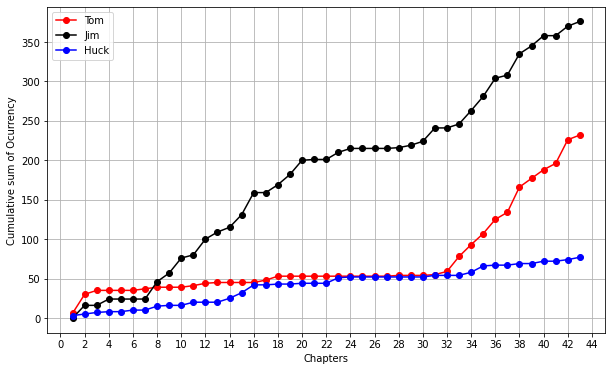

In [24]:
Tom = np.cumsum(data.iloc[0].to_numpy())
Jim = np.cumsum(data.iloc[1].to_numpy())
Huck = np.cumsum(data.iloc[2].to_numpy())
caps = np.arange(1,44)

plt.figure(figsize=(10,6))
plt.plot(caps,Tom,"ro-",label="Tom")
plt.plot(caps,Jim,"ko-",label="Jim")
plt.plot(caps,Huck,"bo-",label="Huck")
plt.xlabel("Chapters")
plt.ylabel("Cumulative sum of appearances")
plt.xticks(np.arange(0,45,2))
plt.grid()
plt.legend()
plt.show()

#### **Análisis**

* Sobre Jim, notamos que es el personaje que  tiene mayor suma total de apariciones a medida que aumentan los capítulos, apartir del capítulo 8 y hasta el final del libro. Por lo tanto, es el personaje principal y aquél sobre el que gira la trama del libro; podemos catalogarlo como un personaje de alto impacto respecto a los demás a partir del capítulo 8. Sin embargo, antes del capítulo 8 es un personaje de impacto medio respecto a los demás. 

* Sobre Tom, notamos que tiene un impacto en la historia poco pero constante hasta el capítulo 32, sin superar la suma de 50 apariciones a lo largo de estos capítulos. En los primeros 8 capítulos podemos catalogarlo como personaje de alto impacto, en los capítulos del 8 al 22 de impacto medio. Dado que la variación en la suma total de apariciones a partir del capítulo 18 hasta el 32 es constante, su aparición en estos capítulos es mínima y no aporta a la historia. Posterior al capítulo 32 la suma de apariciones totales de Tom aumentan linealmente, tomando un lugar considerable en la historia pero manteniendo su impacto medio.  

* Sobre Huck, notamos que su impacto en la historia a través de todos los capítulos es bajo y con tendencia lineal plana al alza , es decir, pendiente positiva pero menor a uno. Cabe resaltar que a partir del capítulo 23 hasta el 32, las apariciones de Tom y Huck son igual de pobres, nulas, no aportan a la historia. 